In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 14.6

In [ ]:
regr = linear_model.LinearRegression()

X = [[164], [179], [162], [170]]
y = [53, 63, 55, 59]

regr.fit(X, y)

# 14.7

In [ ]:
coef = regr.coef_
intercept = regr.intercept_
score = regr.score(X, y)

print('y =', coef, "* X + ", intercept)
print('The score of this line for the data: ',score)

In [ ]:
input_data = [[180], [185]]

result = regr.predict(input_data)
print(result)

# 14.8

In [ ]:
plt.scatter(X, y, color='black')

y_pred = regr.predict(X)

plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

# 14.9

In [ ]:
diabetes = datasets.load_diabetes()

print('shape of diabetes.data :', diabetes.data.shape)
print('입력 데이터 특성 :', diabetes.feature_names)
print(diabetes.data)

In [ ]:
print(diabetes.DESCR)

In [ ]:
X = diabetes.data[:, 2]
print(X)

In [ ]:
X = diabetes.data[:, np.newaxis, 2]
print(X)

In [ ]:
A = np.array([1, 2, 3])
print(A.shape)

B = A[:, np.newaxis]
print(B.shape)

C = A[np.newaxis, :]
print(C.shape)

# 14.10

In [ ]:
regr.fit(X, diabetes.target)
print(regr.coef_, regr.intercept_)
print(regr.score(X, diabetes.target))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data[:, np.newaxis, 2],
                                                    diabetes.target,
                                                    test_size=0.2)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

score = regr.score(X_train, y_train)
print(score)

score = regr.score(X_test, y_test)
print(score)

In [ ]:
 help(train_test_split)

# 14.12

In [ ]:
regr = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target,
                                                    test_size=0.2)

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(y_pred)
print(y_test)

# 14.13

In [ ]:
regr = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target,
                                                    test_size=0.2)

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

plt.scatter(y_pred, y_test, color='black')

x  = np.linspace(0, 330, 100)
plt.plot(x, x, linewidth = 3, color = 'blue')
plt.show()

In [ ]:
print('Mean squard error:', mean_squared_error(y_test, y_pred))

# 14.16

In [ ]:
iris = datasets.load_iris()

print(iris.data.shape)
print(type(iris), type(iris.data), dir(iris))
print(iris.feature_names)
print(iris.data)
print(iris.DESCR)

# 14.17

In [ ]:
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target)

# 14.18

In [ ]:
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size= 0.2)

num_neigh = 1
knn = KNeighborsClassifier(n_neighbors=num_neigh)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)

print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(num_neigh, scores))


# 14.19

In [ ]:
iris = datasets.load_iris()

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris.data, iris.target)

classes = {0 : 'setosa', 1: 'versicolor', 2 : 'virginica'}

X = [[3, 4, 5, 2],
     [5, 4, 2, 2]]
y = knn.predict(X)

print(classes[y[0]])
print(classes[y[1]])


# 14.20

In [ ]:
iris = datasets.load_iris()

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris.data, iris.target)

y_pred_all = knn.predict(iris.data)
conf_map = metrics.confusion_matrix(iris.target, y_pred_all)

plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap = plt.cm.jet)

print(conf_map)

plt.matshow(conf_map, cmap = plt.cm.gray)

# 14.22

In [2]:
life = pd.read_csv('D:/Study/BigData2/data/life_expectancy.csv')

print(life.head())

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria   HIV/AIDS         GDP  Population  \
0    6.0            

In [ ]:
life = life[['Life expectancy', 'Year', 'Alcohol', 'Percentage expenditure',
             'Total expenditure', 'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP',
             'Thinness 1-19 years', 'Thinness 5-9 years']]

print(life.shape)
print(life.isnull().sum())

life.dropna(inplace= True)
print(life.shape)

# 14.23

In [ ]:
sns.set(rc={'figure.figsize' : (12, 10)})
correlation_matrix = life.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# 14.24

In [ ]:
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Measles',
                   'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()

# 14.25

RMSE = 6.374318383243175


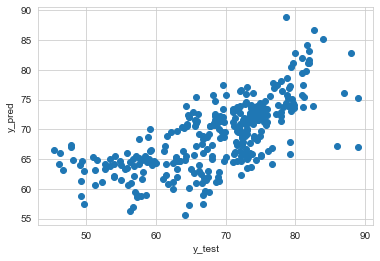

In [6]:
life.dropna(inplace= True)
X = life[['Alcohol', 'Percentage expenditure', 'Polio',
          'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, y_train)

y_test_predict = lin_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE =', rmse)


plt.scatter(y_test, y_test_predict)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# 도전문제 2

In [ ]:
mse = np.mean((y_pred - y_test) ** 2)
print('평균제곱 오차(MSE):',mse)

# 도전문제 3

In [ ]:
ris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size= 0.2)

for i in [1, 3, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)

    print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(i, scores))

# Lab1

In [ ]:
regr = linear_model.LinearRegression()

X = [[164, 1], [167, 1], [165, 0], [170, 0], [179, 0], [163, 1], [159, 0], [166, 1]]
y = [43, 48, 47, 66, 67, 50, 52, 44]
regr.fit(X, y)

coef = regr.coef_
intercept = regr.intercept_
score = regr.score(X, y)

input_data = [[166, 1], [166, 0]]
y_pred = regr.predict(input_data)

print('계수 :', coef)
print('절편 :', intercept)
print('점수 :', score)

print('은지와 동민이의 추정 몸무게 :', y_pred)


# Lab 2

In [ ]:
regr = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target,
                                                    test_size=0.2)

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

plt.scatter(y_pred, y_test, color = 'blue')
plt.show()